# Round Trip Optimization

In [1]:
#Imports
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import reeds
from pygromos.files import repdat
from reeds.function_libs.analysis import visualisation as vis
from reeds.function_libs.optimization.src import sopt_Pathstatistic as parseS
from reeds.function_libs.optimization import eds_s_values as sopt_wrap


vis.figsize = [16,9]



## Data:
Let's define here paths to the necessary files and parse them.

In [ ]:
rep_dat_path = "/cluster/work/igc/bschroed/REEDS/CHK1/complex_d5/d_sopt/sopt1/analysis/data/CHK1_disres5_complex_sopt_1_run_repdat.dat"


## RE-Analysis - Exchange/Roundtrip analysis

### replica transitions

Here first the transition statistics are calculated for each replica position

In [9]:
#parse data:
replica_data = repdat.Repdat(rep_dat_path)
#calculate transitions
transitions = replica_data.get_replica_traces()

vars(replica_data).keys()

dict_keys(['system', 'DATA', 'path', 'transition_traces'])

### transitions
In this plot all exchanges of all replicas are shown. 

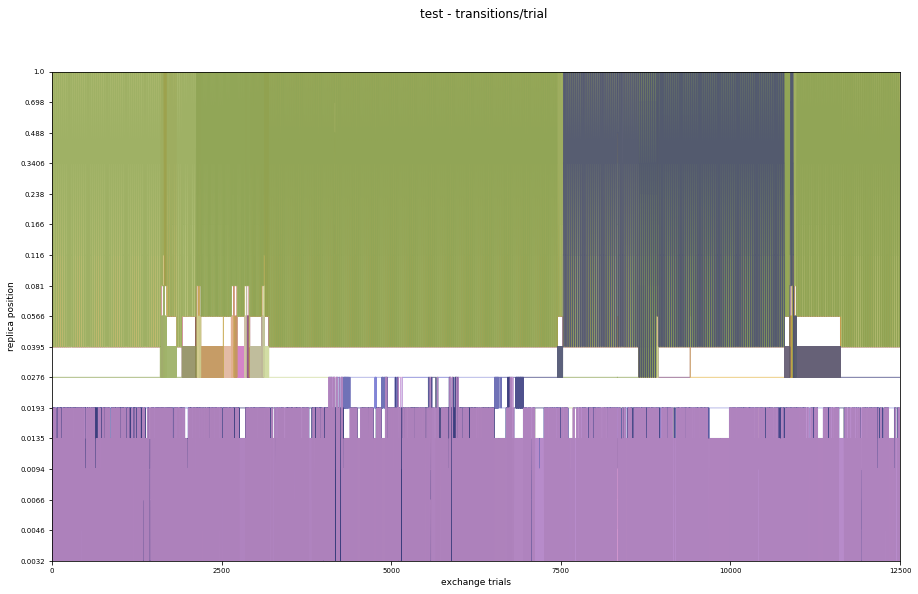

In [6]:
vis.plot_replica_transitions(transitions, s_values=replica_data.system.s, cut_1_replicas=True, out_path=None)

### Replica traces

In this visualisation the trace of one replica is shown over all replica positions.
The coloring shows the minimal state sampling per frame. 
In order to aggregate the sampling information the visualization bins always ten steps and assigns the color of the major dominating state (6 out of 10). if no state is able to get this majority in a bin, the undefined color is assigned. 
Undersampling for example is very often in such a state.
The legend show the absolute domination sampling fractions of the different states.

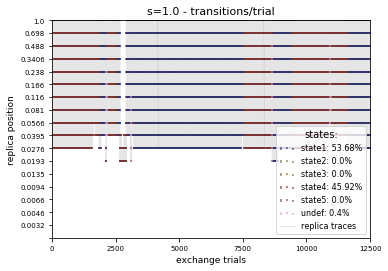

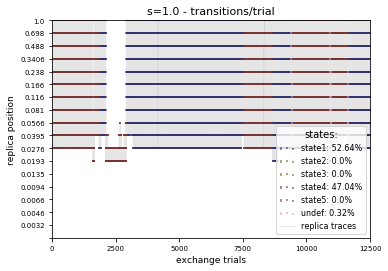

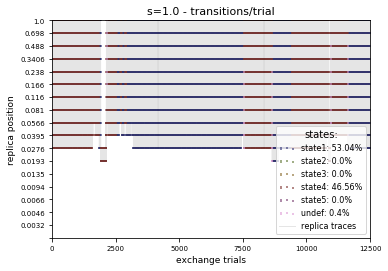

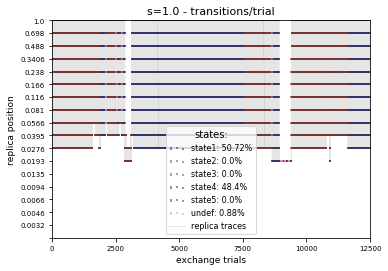

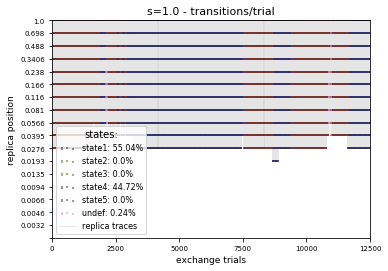

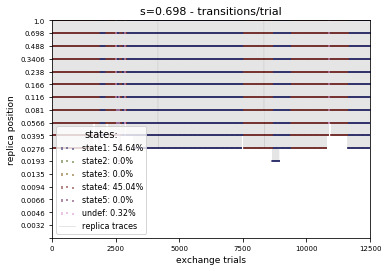

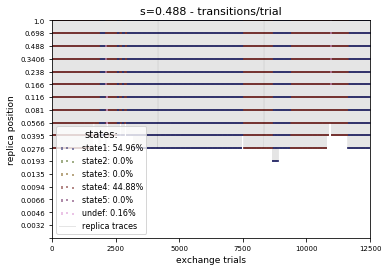

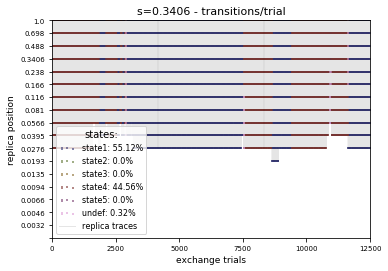

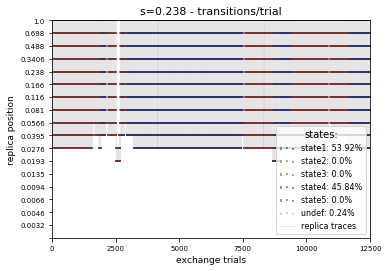

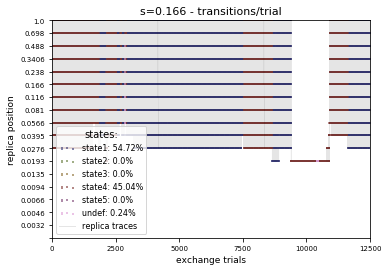

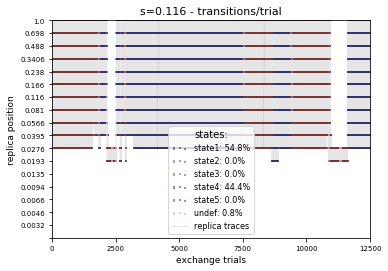

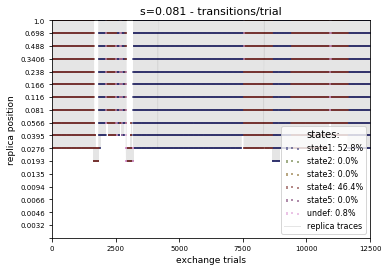

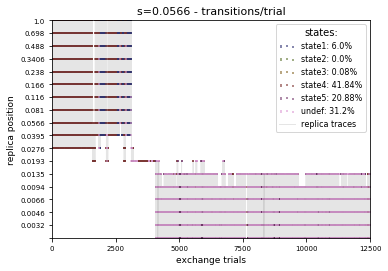

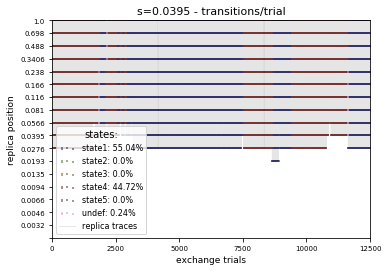

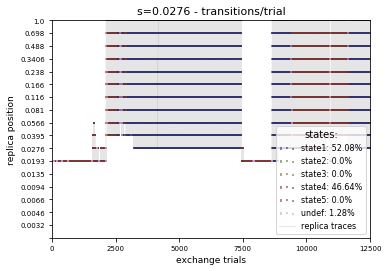

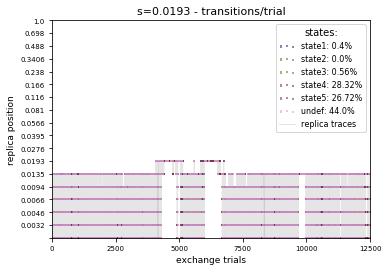

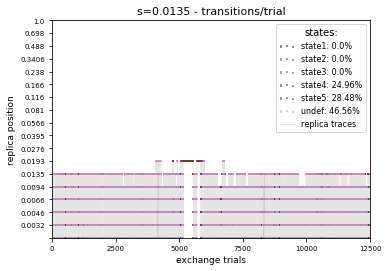

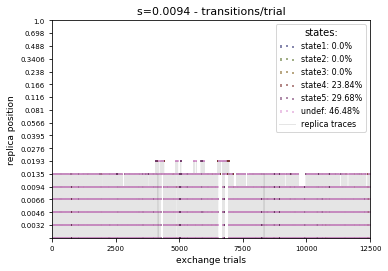

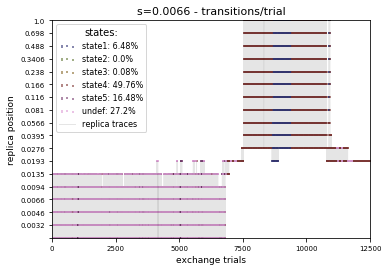

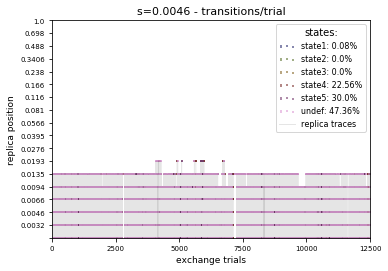

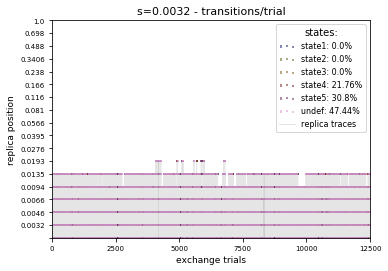

In [20]:
for replica in range(1, len(replica_data.system.s) + 1):  # future: change to ->repdat_file.num_replicas
    single_transition_trace = transitions.loc[transitions.replicaID == replica]
    vis.plot_replica_transitions_min_states(single_transition_trace, s_values=replica_data.system.s,
                                            title_prefix= "s="+str(replica_data.system.s[replica-1]),
                                            out_path=None, cut_1_replicas=True)

## Optimize S

### Pre - analysis step

In [8]:
stat = parseS.generate_PathStatistic_from_file(rep_dat_path)

#attributes:
vars(stat).keys()

	Reading 21 replicas with 5 states, skipping the first 4 replicas. 



dict_keys(['n_replicas', 'n_up', 'n_down', 'paths', 's_values', 'skipped_s_values'])

### N-LRTO


In [22]:
add_s_vals = 4
state_weights = [1,1,1,1,1]
verbose = True

new_svals_NLRTO, NLRTO = sopt_wrap.calc_NLRTO(stat, add_n_s=add_s_vals, state_weights=state_weights,
                                              verbose=verbose)

#attributes:
vars(NLRTO).keys()



Starting N-LRTO algorithm.


SOPT - N-LRTO

	> State-WEIGHTS: 1	1	1	1	1


## FLOW STATISTICS

|s        | n_up    |  n_down_state_1|	n_down_state_2|	n_down_state_3|	n_down_state_4|	n_down_state_5|
|---	|---	|---	|---	|---	|---	|---	|
|	1.000000 |       1 |    6899|	       0|	       0|	    5600|	       0|
|	0.698000 |       1 |    6888|	       0|	       0|	    5610|	       1|
|	0.488000 |       1 |    6888|	       0|	       0|	    5610|	       1|
|	0.340600 |       1 |    6888|	       0|	       0|	    5610|	       1|
|	0.238000 |       1 |    6888|	       0|	       0|	    5610|	       1|
|	0.166000 |       1 |    6888|	       0|	       0|	    5610|	       1|
|	0.116000 |       1 |    6888|	       0|	       0|	    5610|	       1|
|	0.081000 |       1 |    6892|	       0|	       0|	    5602|	       5|
|	0.056600 |       1 |    6944|	       0|	       0|	    5531|	      24|
|	0.039500 |      47 |    7006|	       0|	       0|	    5231|	     216|
|	0.027600 |    3409 |    5209|	       0|	  

dict_keys(['statistic', 'state_weights', '_replica_position_flow_list', '_replica_position_flow_list_opt', 'orig_replica_parameters', 'opt_replica_parameters', '__name__'])

Here the calculated replica position flows are shown. They are given as a pandas dataframe. 

In [25]:
flows_df = NLRTO.get_replica_position_flows()
flows_df

,s,f,num_s_in_interval
0,0.0032,0.002797,2.0
1,0.0046,0.002398,2.0
2,0.0066,0.002398,2.0
3,0.0094,0.002398,2.0
4,0.0135,0.002797,2.0
5,0.0193,0.003594,5.0
6,0.0276,2.364086,2.0
7,0.0395,2.955163,2.0
8,0.0566,2.991671,2.0
9,0.0810,2.961474,2.0


Text(0, 0.5, 'f')

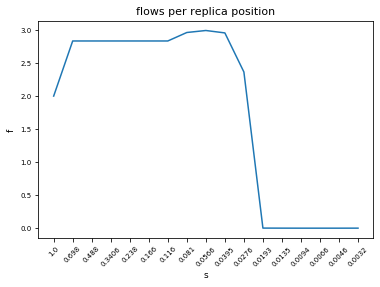

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(list(reversed(flows_df.f)))

ax.set_xticks(range(len(flows_df.s)))
ax.set_xticklabels(reversed(flows_df.s), rotation=45)

ax.set_title("flows per replica position")
ax.set_xlabel("s")
ax.set_ylabel("f")


### N-GRTO

In [14]:
add_s_vals = 4
state_weights = [1,1,1,1,1]
verbose = True

new_svals_NGRTO, NGRTO = sopt_wrap.calc_NGRTO(stat, add_n_s=add_s_vals, state_weights=state_weights,
                                              verbose=verbose)

vars(NGRTO).keys()



Starting N-GRTO algorithm. 

smin  0.0032
smax  1.0
list:flow,svals  [(1.9999352981214757, 1.0), (2.8332686488187884, 0.698), (2.8332686488187884, 0.488), (2.8332686488187884, 0.3406), (2.8332686488187884, 0.238), (2.8332686488187884, 0.166), (2.8332686488187884, 0.116), (2.961473742967296, 0.081), (2.99167057765734, 0.0566), (2.9551626964789492, 0.0395), (2.364085587162132, 0.0276), (0.0035944441707215697, 0.0193), (0.0027972521617198967, 0.0135), (0.00239827400991504, 0.0094), (0.00239827400991504, 0.0066), (0.00239827400991504, 0.0046), (0.0027972521617198967, 0.0032)]
old_num_replicas:  17
add_replicas:  4



1/C_prime 4.007732155811368
C_prime 0.24951767261940422

old_s_vals [1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.116, 0.081, 0.0566, 0.0395, 0.0276, 0.0193, 0.0135, 0.0094, 0.0066, 0.0046, 0.0032]
new_s dist  [1.0, 0.9336999999999984, 0.8673999999999985, 0.8010999999999986, 0.7347999999999987, 0.10719999999999982, 0.08759999999999986, 0.0622999999999999, 0.04219999999999993, 

### Replica Placement from example

[Text(0, 0, 'input S'), Text(0, 0, 'NLRTO'), Text(0, 0, 'NGRTO')]

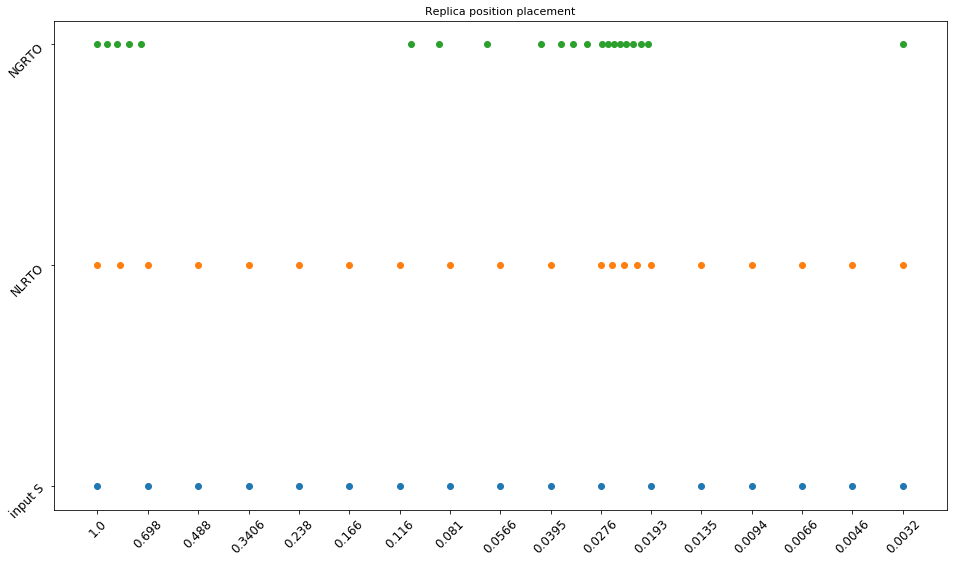

In [57]:
mins, maxs = min(NLRTO.orig_replica_parameters), max(NLRTO.orig_replica_parameters)
num_svals_orig = len(NLRTO.orig_replica_parameters)
num_svals_opt = len(NLRTO.orig_replica_parameters)+add_s_vals



fig = plt.figure(figsize=[16,9])
ax = fig.add_subplot(111)

x_svalues = (-1 * np.log10(np.array(NLRTO.orig_replica_parameters)))[::-1]
ax.scatter(x_svalues, [0 for x in range(num_svals_orig)], label="in s-distribution")

x_svalues = (-1 * np.log10(np.array(NLRTO.opt_replica_parameters)))[::-1]
ax.scatter(x_svalues, [1 for x in range(num_svals_opt)], label="optimized NLRTO")

x_svalues = (-1 * np.log10(np.array(NGRTO.opt_replica_parameters)))[::-1]
ax.scatter(x_svalues, [2 for x in range(num_svals_opt)], label="optimized NGRTO")

#ax.legend(prop={'size': 12})

x_svalues = (-1 * np.log10(np.array(NLRTO.orig_replica_parameters)))[::-1]
ax.set_xticks(x_svalues)
ax.set_xticklabels(NLRTO.orig_replica_parameters[::-1],  fontsize=12, rotation=45)

ax.set_title("Replica position placement")

ax.set_yticks(range(3))
ax.set_yticklabels(["input S", "NLRTO", "NGRTO"], fontsize=12, rotation=45)

## After mutliple optimizations:

See how the bottle neck closed and the dominating sampling distribution neared the optimaluniform sampling distribution.

In [12]:
rep_dat_final_path = "/cluster/work/igc/bschroed/REEDS/CHK1/complex_d5/d_sopt/sopt5/analysis/data/CHK1_disres5_complex_sopt_5_run_repdat.dat"

In [13]:
#parse data:
replica_data = repdat.Repdat(rep_dat_final_path)
#calculate transitions
transitions = replica_data.get_replica_traces()

vars(replica_data).keys()

dict_keys(['system', 'DATA', 'path', 'transition_traces'])

### Transitions 

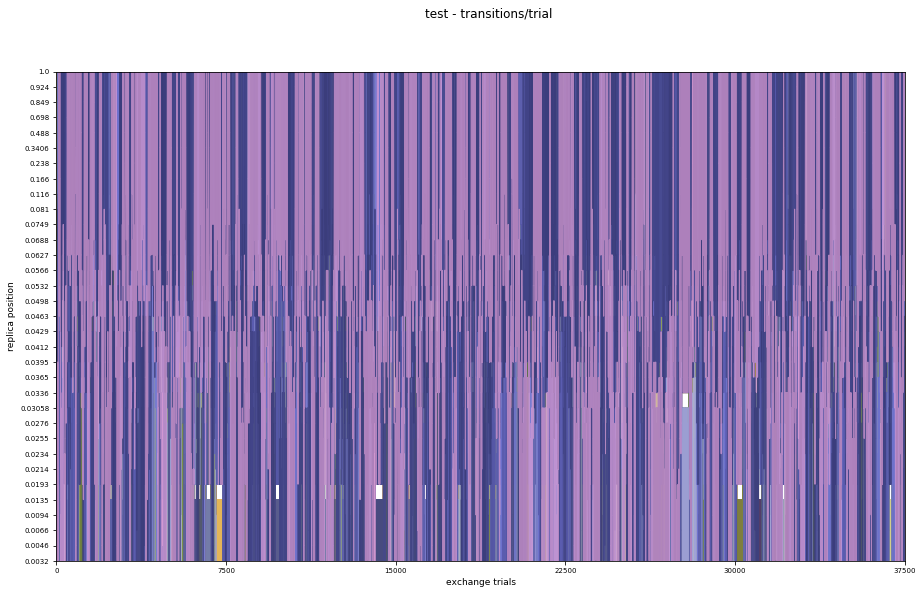

In [14]:
vis.plot_replica_transitions(transitions, s_values=replica_data.system.s, cut_1_replicas=True, out_path=None)

### Transitions 

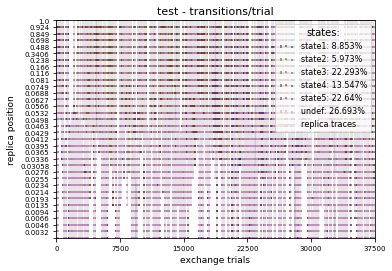

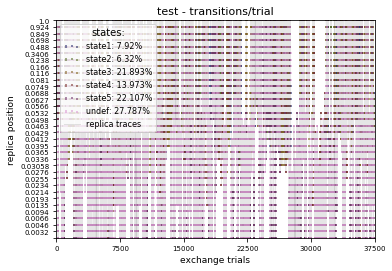

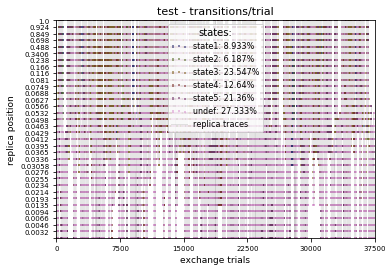

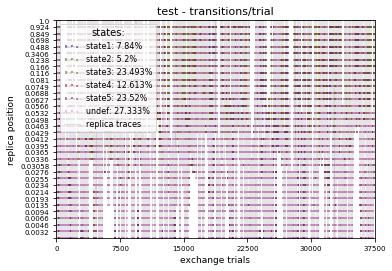

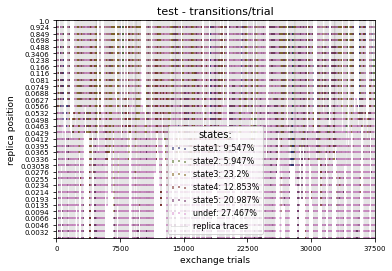

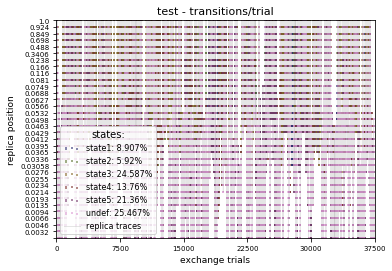

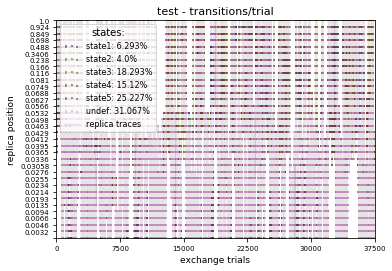

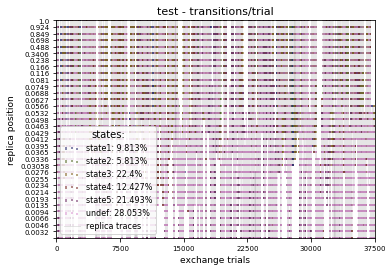

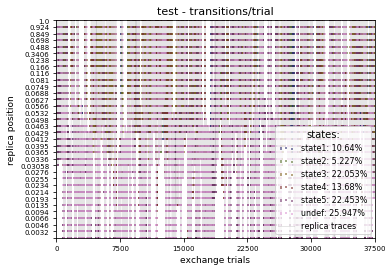

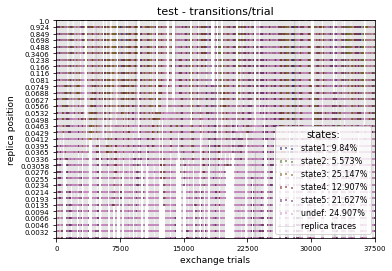

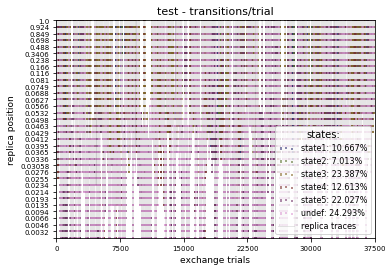

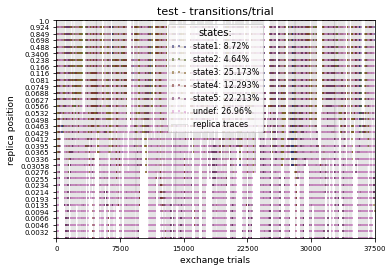

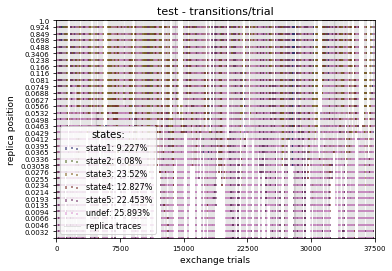

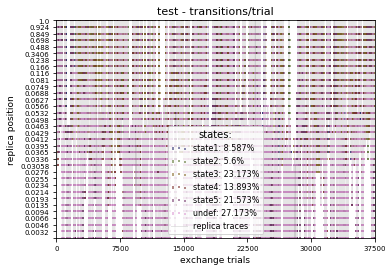

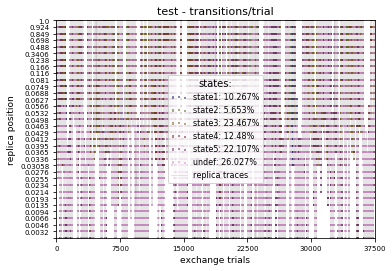

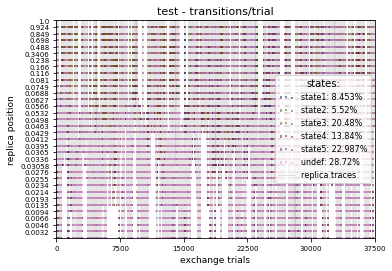

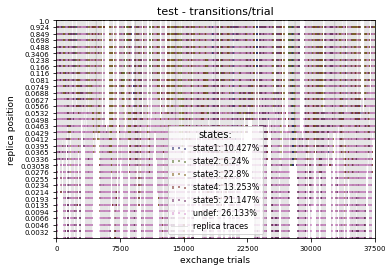

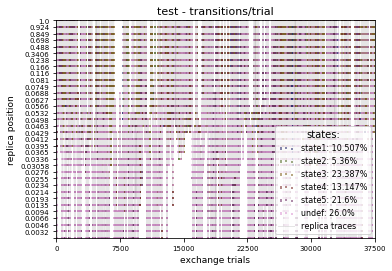

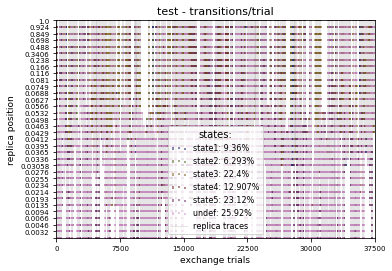

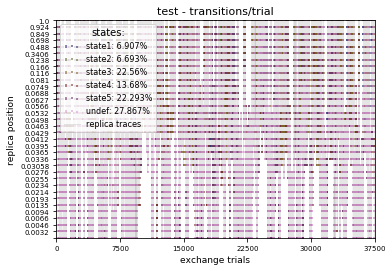

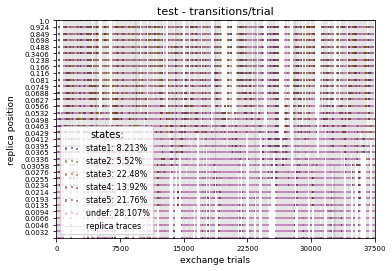

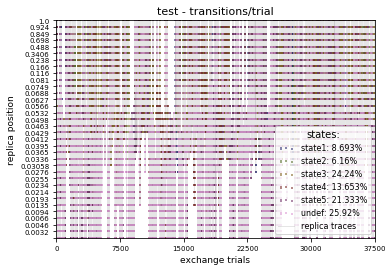

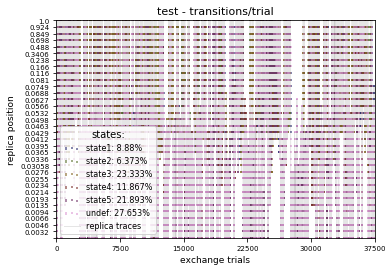

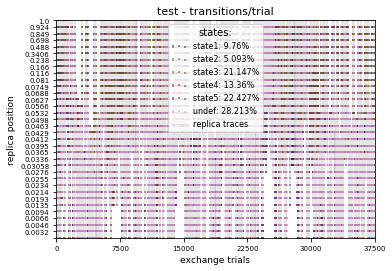

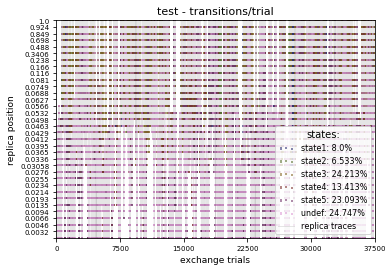

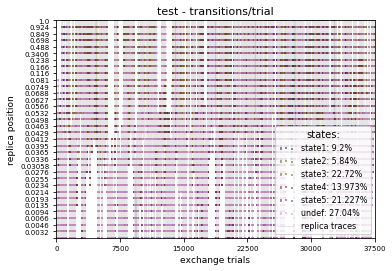

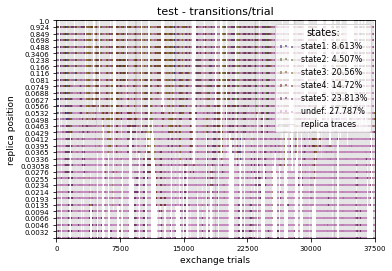

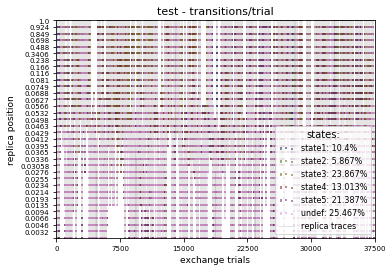

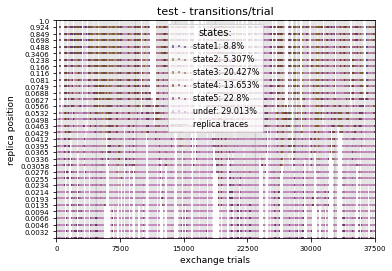

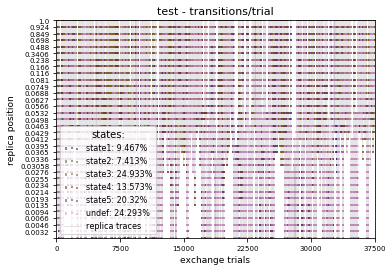

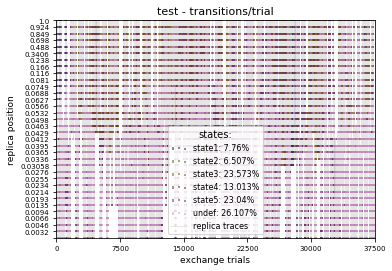

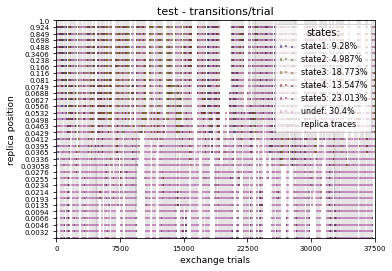

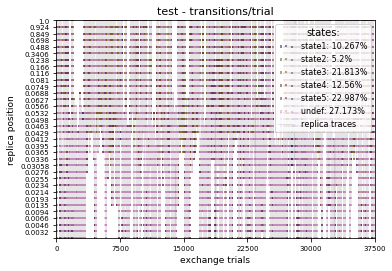

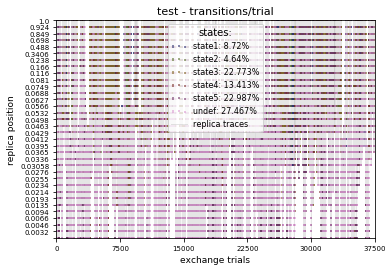

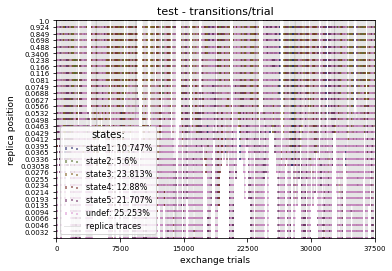

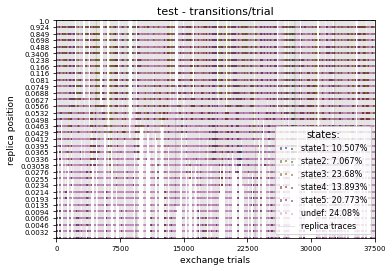

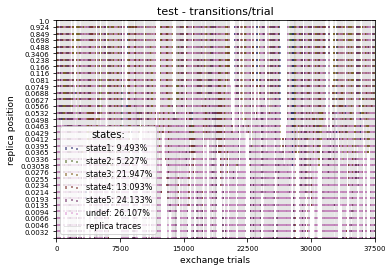

In [15]:
for replica in range(1, len(replica_data.system.s) + 1):  # future: change to ->repdat_file.num_replicas
    single_transition_trace = transitions.loc[transitions.replicaID == replica]
    vis.plot_replica_transitions_min_states(single_transition_trace, s_values=replica_data.system.s,
                                            title_prefix= "s="+str(replica_data.system.s[replica-1]),
                                            out_path=None, cut_1_replicas=True)

## General S-optimization Convergence analysis
Now let's have a look on the overall performance of the optimization approach.

### Getting the data:

In [2]:
import glob
import pickle
import pandas as pd
sopt_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/water_d5/d_sopt_shuffle/"
out_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/water_d5/d_sopt_shuffle/analysis"
sopt_dirs = glob.glob(sopt_dir+"sopt*")

sopt_data = {}
print("\n\nLoading precomputed data for iteration: ", end="\t")
for iteration_folder in sorted(sopt_dirs):
    iteration_folder = iteration_folder.replace(sopt_dir, "")
    iteration = int(iteration_folder.replace("sopt", ""))
    out_iteration_file_path = out_dir + "/" + iteration_folder + "_ana_data.npy"

    if (os.path.exists(out_iteration_file_path)):
        print(iteration, end="\t")
        sopt_it_stats = pickle.load(open(out_iteration_file_path, "rb"))
        if(iteration>1):
            sopt_it_stats.update({"avg_rountrip_duration_optimization_efficiency":  (sopt_data["sopt"+str(iteration - 1)]["avg_rountrip_durations"] -sopt_it_stats["avg_rountrip_durations"])})
        sopt_data.update({iteration_folder: sopt_it_stats})

print()
#data attributes: 
df = pd.DataFrame(sopt_data).T
df     



Loading precomputed data for iteration: 	1	2	3	4	5	6	7	8	


,state_occurence_sampling,state_domination_sampling,stats_per_replica,s_values,sampling_distribution_optimal_deviation_s1,nRoundTrips,avg_nRoundtrips,avg_rountrip_durations,avg_rountrip_duration_optimization_efficiency
sopt1,"{'Vr1': 4088, 'Vr2': 6264, 'Vr3': 164, 'Vr4': ...","{'Vr1': 3548, 'Vr2': 6055, 'Vr3': 0, 'Vr4': 13...","{5: {'roundtrips': 2, 'durations': [1344, 6224...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 14.73, 'MAE_std': 8.216185002785659}",7,0.588235,5685.29,NaN
sopt2,"{'Vr1': 11218, 'Vr2': 10005, 'Vr3': 997, 'Vr4'...","{'Vr1': 10299, 'Vr2': 9262, 'Vr3': 662, 'Vr4':...","{5: {'roundtrips': 8, 'durations': [4110, 430,...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 15.3, 'MAE_std': 6.506585586926525}",21,7.71429,3404.44,2280.85
sopt3,"{'Vr1': 17518, 'Vr2': 12481, 'Vr3': 4314, 'Vr4...","{'Vr1': 15047, 'Vr2': 10551, 'Vr3': 3436, 'Vr4...","{5: {'roundtrips': 92, 'durations': [314, 104,...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 11.31, 'MAE_std': 6.24881236716226}",25,92.44,402.075,3002.36
sopt4,"{'Vr1': 16627, 'Vr2': 11644, 'Vr3': 4251, 'Vr4...","{'Vr1': 14398, 'Vr2': 9630, 'Vr3': 3326, 'Vr4'...","{5: {'roundtrips': 108, 'durations': [332, 68,...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 9.63, 'MAE_std': 5.025416997623182}",29,124.655,299.243,102.832
sopt5,"{'Vr1': 15419, 'Vr2': 12192, 'Vr3': 4630, 'Vr4...","{'Vr1': 12962, 'Vr2': 10112, 'Vr3': 3820, 'Vr4...","{5: {'roundtrips': 141, 'durations': [72, 158,...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 8.61, 'MAE_std': 4.444509421747242}",33,156.879,237.74,61.5027
sopt6,"{'Vr1': 15389, 'Vr2': 12140, 'Vr3': 3648, 'Vr4...","{'Vr1': 13170, 'Vr2': 10372, 'Vr3': 2764, 'Vr4...","{5: {'roundtrips': 172, 'durations': [170, 158...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 9.11, 'MAE_std': 4.588827301174015}",37,163.459,229.101,8.63919
sopt7,"{'Vr1': 16241, 'Vr2': 12947, 'Vr3': 4187, 'Vr4...","{'Vr1': 13703, 'Vr2': 10938, 'Vr3': 3307, 'Vr4...","{5: {'roundtrips': 168, 'durations': [282, 116...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 10.28, 'MAE_std': 4.6928140811244585}",41,167.829,222.789,6.31215
sopt8,"{'Vr1': 15603, 'Vr2': 13273, 'Vr3': 3715, 'Vr4...","{'Vr1': 13291, 'Vr2': 11410, 'Vr3': 2838, 'Vr4...","{5: {'roundtrips': 180, 'durations': [204, 60,...","[1.0, 0.698, 0.488, 0.3406, 0.238, 0.166, 0.11...","{'MAE': 10.35, 'MAE_std': 3.850488800139534}",45,164.111,227.812,-5.02261


### S-optimization overview

12500 [3548, 6055, 0, 1337, 1560]
25000 [10299, 9262, 662, 4345, 432]
37500 [15047, 10551, 3436, 6800, 1666]
37500 [14398, 9630, 3326, 5980, 4166]
37500 [12962, 10112, 3820, 7062, 3544]
37500 [13170, 10372, 2764, 6844, 4350]
37500 [13703, 10938, 3307, 6664, 2888]
37500 [13291, 11410, 2838, 6089, 3872]


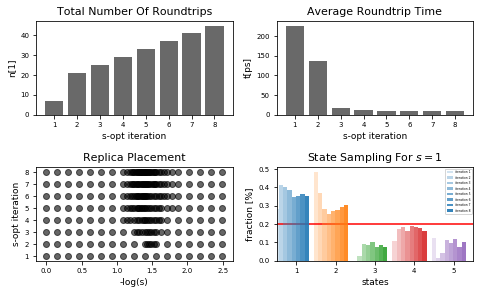

In [6]:
#overview
from reeds.function_libs.analysis.visualisation import visualization_s_optimization_summary
visualization_s_optimization_summary(s_opt_data=sopt_data,)


### s-optimization Round Trip Time convergence

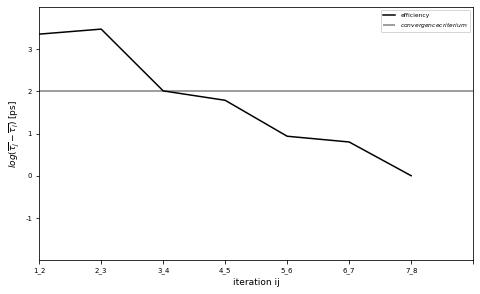

In [5]:
from reeds.function_libs.analysis.visualisation import visualize_s_optimisation_convergence
visualize_s_optimisation_convergence(s_opt_data=sopt_data)


### S-optimization - sampling distribution optimization

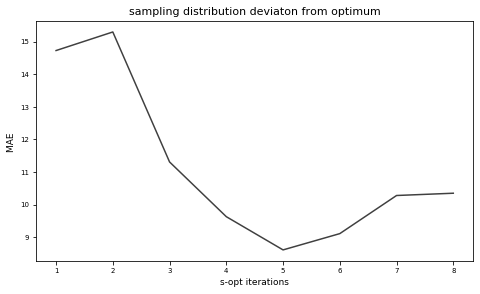

In [10]:
from reeds.function_libs.analysis.visualisation import visualize_s_optimisation_sampling_optimization
visualize_s_optimisation_sampling_optimization(s_opt_data=sopt_data)
